In [34]:
!rm -rf ./sample_data

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('shopping_behavior_updated.csv')

#Data Prepration and Cleaning

In [37]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [38]:
df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [39]:
df.shape

(3900, 18)

In [40]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [41]:
#Data reading, checking dimensions and information of the data
print(df)

print('dimensions:')
print(df.shape)

print('Information:')
df.info()

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [42]:
print(df.apply(lambda col: col.unique()))

Customer ID               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Age                       [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 3...
Gender                                                       [Male, Female]
Item Purchased            [Blouse, Sweater, Jeans, Sandals, Sneakers, Sh...
Category                       [Clothing, Footwear, Outerwear, Accessories]
Purchase Amount (USD)     [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 68, 7...
Location                  [Kentucky, Maine, Massachusetts, Rhode Island,...
Size                                                          [L, S, M, XL]
Color                     [Gray, Maroon, Turquoise, White, Charcoal, Sil...
Season                                       [Winter, Spring, Summer, Fall]
Review Rating             [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, ...
Subscription Status                                               [Yes, No]
Shipping Type             [Express, Free Shipping, Next Day Air, Standar...
Discount App

In [43]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [44]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [45]:
#Cheking for duplicates
value=len(df[df.duplicated()])
print(value)

0


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [47]:
location_counts = df["Location"].value_counts()
print("Location Counts:\n", location_counts)

Location Counts:
 Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii          

In [48]:
category_counts = df.groupby("Location")["Category"].value_counts()
print("Regional Category Trends:\n", category_counts)

Regional Category Trends:
 Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: Category, Length: 200, dtype: int64


In [49]:
location_purchase_stats = df.groupby("Location")["Purchase Amount (USD)"].agg(["mean", "median", "sum"])
print("Regional Purchase Amount Stats:\n", location_purchase_stats)

Regional Purchase Amount Stats:
                      mean  median   sum
Location                               
Alabama         59.112360    56.0  5261
Alaska          67.597222    68.5  4867
Arizona         66.553846    68.0  4326
Arkansas        61.113924    58.0  4828
California      59.000000    57.0  5605
Colorado        56.293333    51.0  4222
Connecticut     54.179487    48.5  4226
Delaware        55.325581    52.5  4758
Florida         55.852941    56.0  3798
Georgia         58.797468    62.0  4645
Hawaii          57.723077    55.0  3752
Idaho           60.075269    62.0  5587
Illinois        61.054348    65.0  5617
Indiana         58.924051    60.0  4655
Iowa            60.884058    60.0  4201
Kansas          54.555556    50.0  3437
Kentucky        55.721519    53.0  4402
Louisiana       57.714286    55.5  4848
Maine           56.987013    57.0  4388
Maryland        55.755814    52.0  4795
Massachusetts   60.888889    64.0  4384
Michigan        62.095890    63.0  4533
Minneso

In [50]:
shipping_type_counts = df.groupby("Location")["Shipping Type"].value_counts()
print("Regional Shipping Type Trends:\n", shipping_type_counts)

Regional Shipping Type Trends:
 Location  Shipping Type 
Alabama   Express           20
          Store Pickup      19
          Next Day Air      17
          2-Day Shipping    16
          Free Shipping      9
                            ..
Wyoming   Express           13
          Next Day Air      12
          Standard          11
          Free Shipping     10
          2-Day Shipping     8
Name: Shipping Type, Length: 300, dtype: int64


In [51]:
location_groups = df.groupby("Location")

# Analyze regional trends
for location, location_data in location_groups:
    print(f"Regional Trends for {location}:")

    # Calculate average purchase amount in this region
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f"Average Purchase Amount: ${avg_purchase_amount:.2f}")

    # Count the most popular product categories in this region
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Most Popular Category: {popular_categories}")

    # Analyze online shopping preferences
    online_shopping = location_data["Shipping Type"].apply(lambda x: "Online" if "Express" in x or "Standard" in x else "Offline")
    online_percentage = (online_shopping.value_counts() / len(online_shopping)) * 100
    print(f"Online Shopping Preference:")
    print(online_percentage)

    # Consider other factors based on your data and business context

    print("\n")

Regional Trends for Alabama:
Average Purchase Amount: $59.11
Most Popular Category: Clothing
Online Shopping Preference:
Offline    68.539326
Online     31.460674
Name: Shipping Type, dtype: float64


Regional Trends for Alaska:
Average Purchase Amount: $67.60
Most Popular Category: Clothing
Online Shopping Preference:
Offline    58.333333
Online     41.666667
Name: Shipping Type, dtype: float64


Regional Trends for Arizona:
Average Purchase Amount: $66.55
Most Popular Category: Clothing
Online Shopping Preference:
Offline    66.153846
Online     33.846154
Name: Shipping Type, dtype: float64


Regional Trends for Arkansas:
Average Purchase Amount: $61.11
Most Popular Category: Clothing
Online Shopping Preference:
Offline    65.822785
Online     34.177215
Name: Shipping Type, dtype: float64


Regional Trends for California:
Average Purchase Amount: $59.00
Most Popular Category: Clothing
Online Shopping Preference:
Offline    66.315789
Online     33.684211
Name: Shipping Type, dtype: fl

#Data Visualization


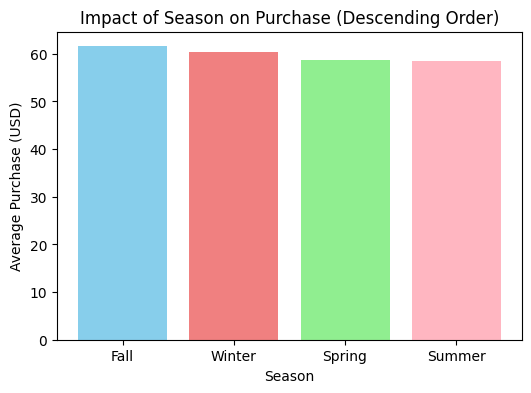

In [52]:
seasons = df['Season'].unique()
average_purchase_by_season = df.groupby('Season')['Purchase Amount (USD)'].mean()

# Sort the data in descending order based on average purchase
sorted_data = average_purchase_by_season.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(6, 4))
plt.bar(sorted_data.index, sorted_data, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title("Impact of Season on Purchase (Descending Order)")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")
plt.show()

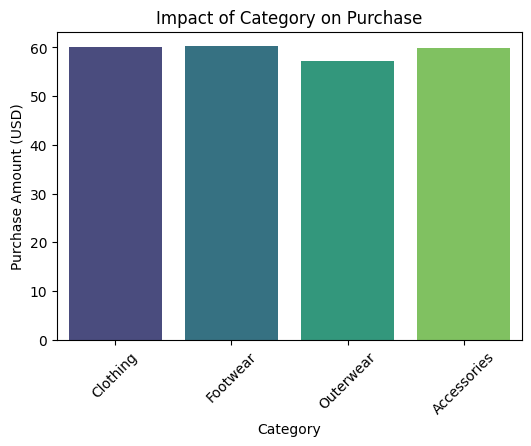

In [53]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, ci=None, palette='viridis')
plt.title("Impact of Category on Purchase")
plt.xticks(rotation=45)
plt.show()

Data Visualization


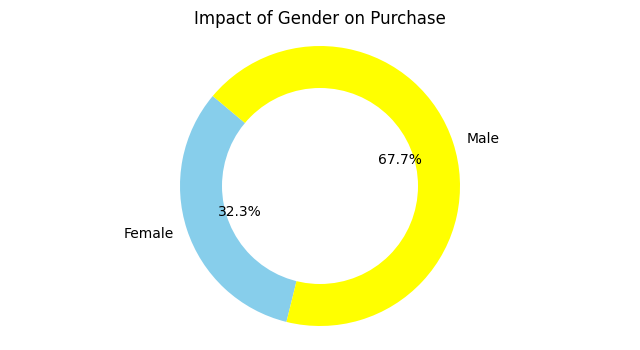

In [54]:
gender_purchase = df.groupby('Gender')['Purchase Amount (USD)'].sum()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(gender_purchase, labels=gender_purchase.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellow'], wedgeprops=dict(width=0.4))
ax.set_title("Impact of Gender on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that the chart is drawn as a circle.

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

plt.show()

From these data it can be concluded that Males are more likely to spend  (67%), whereas females are less likely to spend (32%).

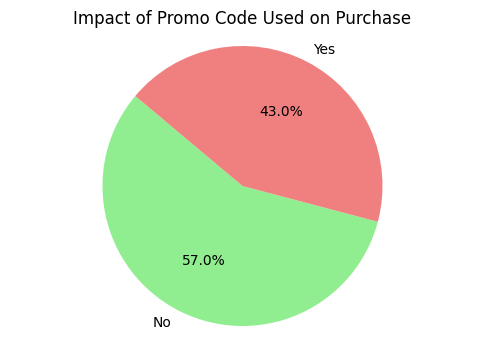

In [55]:
promo_counts = df['Promo Code Used'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title("Impact of Promo Code Used on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The use of promo codes is not really affected because without promo codes people still  on purchase.

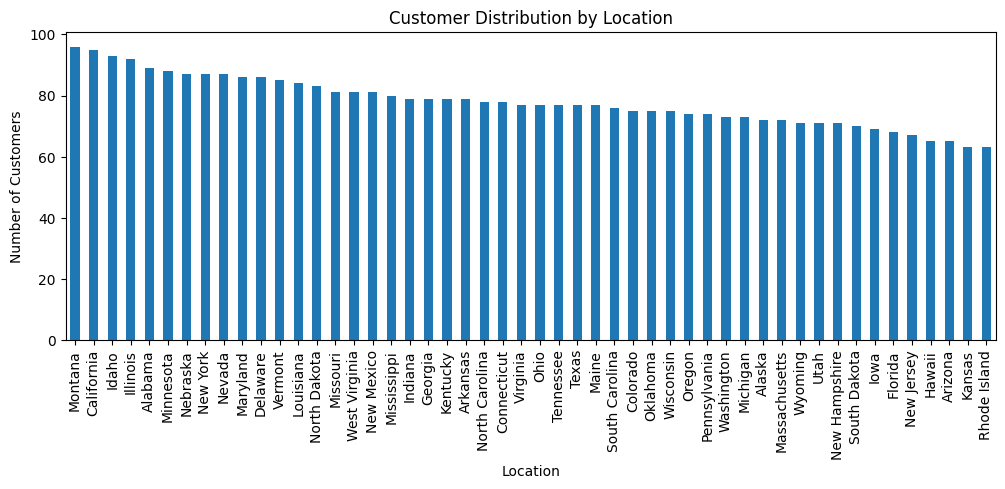

In [56]:
location_counts.plot(kind="bar", figsize=(12, 4))
plt.title("Customer Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.show()

Montana stands out with its remarkable number of customers, surpassing all other states in this regard. The state's thriving business landscape and vibrant consumer market have contributed to its impressive customer base.

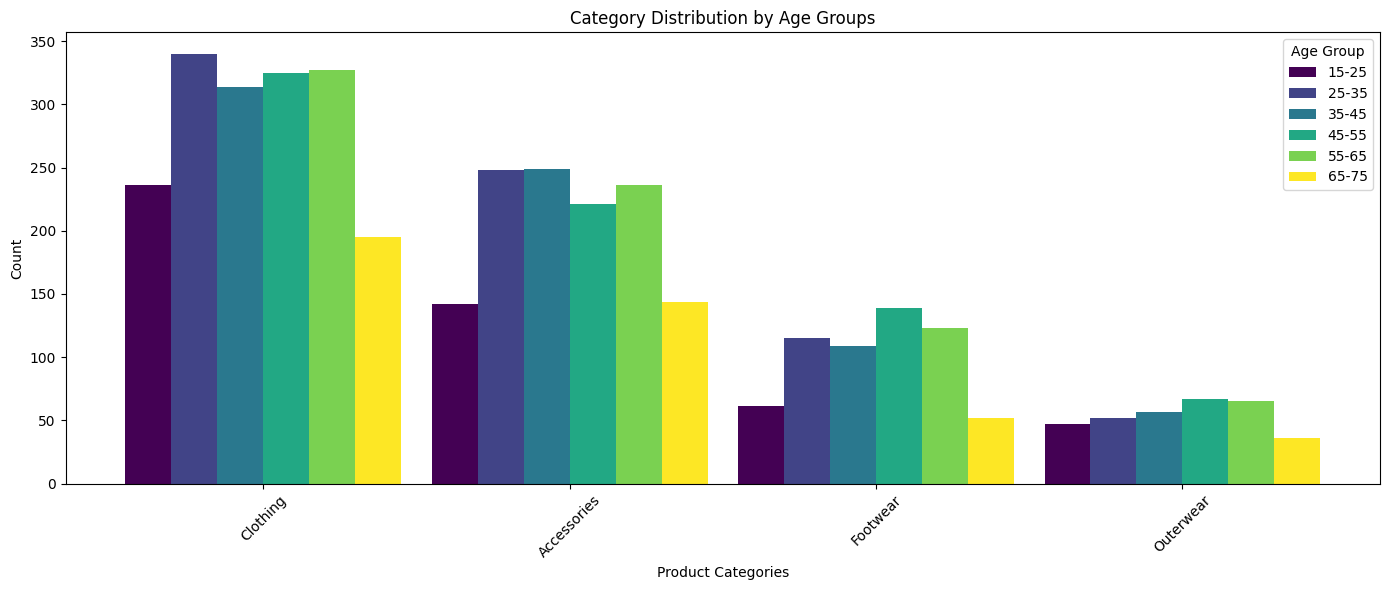

In [57]:
age_groups = [15, 25, 35, 45, 55, 65]

# Create subplots for each age group
fig, ax = plt.subplots(figsize=(14, 6))

# Create a colormap for age groups
colors = plt.cm.viridis(np.linspace(0, 1, len(age_groups)))

# Initialize a dictionary to store category counts for each age group
category_counts_by_age = {age: [] for age in age_groups}

# Calculate category counts for each age group
for age in age_groups:
    age_group_data = df[(df['Age'] >= age) & (df['Age'] < age + 10)]
    category_counts = age_group_data['Category'].value_counts()
    category_counts_by_age[age] = category_counts

# Create the bar chart
width = 0.15
x = np.arange(len(category_counts_by_age[age_groups[0]].index))

for i, age in enumerate(age_groups):
    category_counts = category_counts_by_age[age]
    ax.bar(x + i * width, category_counts, width=width, label=f'{age}-{age+10}', color=colors[i])

ax.set_xlabel('Product Categories')
ax.set_ylabel('Count')
ax.set_title('Category Distribution by Age Groups')
ax.set_xticks(x + width * (len(age_groups) - 1) / 2)
ax.set_xticklabels(category_counts_by_age[age_groups[0]].index, rotation=45)
ax.legend(title='Age Group')

plt.tight_layout()
plt.show()

As we can see Clothing is the most popular category among the all age groups. Accessories equally famous in all age groups except 15-25 and 65-75 age groups. However, we have seen that in Footwear category is most famous in 45-55 age Groupe. The last one Outerwear is almost equally famous in all age groups.

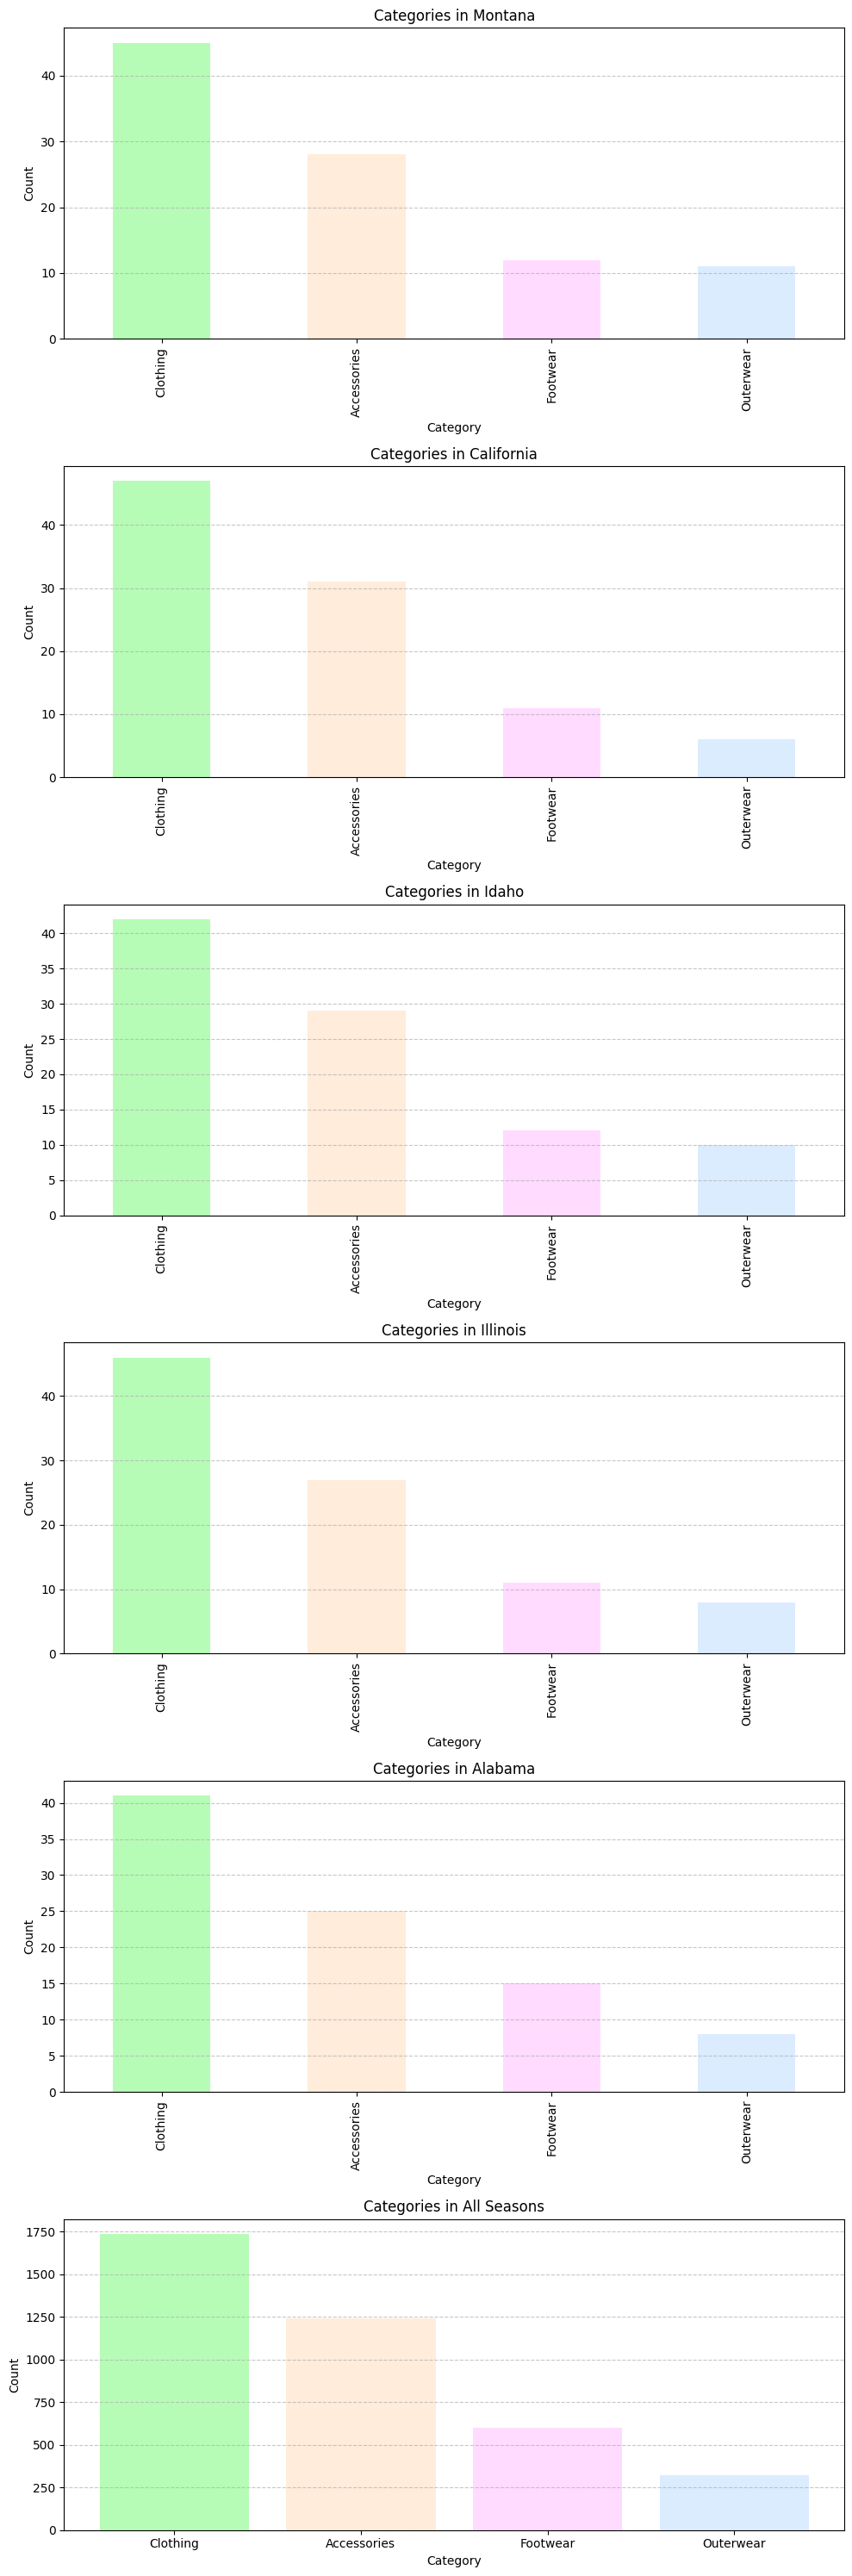

In [70]:
# Assuming 'Location' and 'Season' are columns in your DataFrame
top_locations = df['Location'].value_counts().head(5).index
all_seasons = df['Season'].value_counts().index

# Define different colors for bars
colors = ['#98FB98', '#FFE5CC', '#FFCCFF', '#CCE5FF', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a subplot grid for each top location
fig, axes = plt.subplots(len(top_locations) + 1, 1, figsize=(10, 5 * (len(top_locations) + 1)))

# Iterate through the top locations and create category distribution plots with different colors
for i, location in enumerate(top_locations):
    location_data = df[df['Location'] == location]

    # Count the most common product categories in this location
    category_counts = location_data['Category'].value_counts().head(10)

    # Create a bar plot for the category distribution with different colors
    ax = axes[i]
    category_counts.plot(kind='bar', ax=ax, color=colors, alpha=0.7)
    ax.set_title(f"Categories in {location}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create a subplot for all seasons
all_season_data = df[df['Season'].isin(all_seasons)]
all_season_category_counts = all_season_data['Category'].value_counts().head(10)
ax_all_seasons = axes[len(top_locations)]
ax_all_seasons.bar(all_season_category_counts.index, all_season_category_counts, color=colors, alpha=0.7)
ax_all_seasons.set_title("Categories in All Seasons")
ax_all_seasons.set_xlabel("Category")
ax_all_seasons.set_ylabel("Count")
ax_all_seasons.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust subplot layout for a clean appearance
plt.tight_layout()

# Display the visualizations
plt.show()


As we can see, the least outerwear is purchased in Montana, California, Idaho, Illinois and Alabama which are the top five states and in all seasons

#Insights



*   Customers tend to make more purchases during the winter and fall compared to other seasons
*   outerwear is the least purchased in the top five states and in all seasons than other categories, indicating potential for improvement.
*   Men accounted for 67% of the total spending, while women only accounted for 32% of purchases.
*   Montana stands out with a remarkable number of customers, indicating a thriving consumer market
*   Footwear is particularly popular among the 45-55 age group.
*   Outerwear enjoys consistent popularity across all age groups









#Conclusion

The analysis of customer behavior and purchase data has revealed several valuable insights. Seasonal variations, product categories, gender, size, and promo code usage all play a role in shaping customer purchase decisions. The data also indicates that Montana has a strong consumer market, and clothing is the preferred product category across age groups. These findings can inform marketing strategies, product offerings, and promotions to better target and serve different customer segments.